In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR="/mnt/Data/data"

In [3]:
import pandas as pd
from pathlib import Path

In [4]:
loaded_metrics = pd.read_hdf(Path(BASE_DIR) / "results_metrics.h5")

In [5]:
loaded_metrics.head()

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy
0,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 33, 'falsepositive': 3963, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9947009841029523, 0.78147867...","[0.008258258258258258, 0.008258258258258258, 0..."
1,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.551...","[1.0, 1.0, 1.0, 0.9946848899012908, 0.77980258...","[0.01225, 0.01225, 0.01225, 0.0123146519225936..."
2,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9649122807017544, ...","[1.0, 1.0, 1.0, 0.9939132640121735, 0.77098655...","[0.01425, 0.01425, 0.01425, 0.0143360160965794..."
3,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9545454545454...","[1.0, 1.0, 1.0, 0.9944402324993682, 0.77659843...","[0.010997250687328168, 0.010997250687328168, 0..."
4,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9850746268656...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0..."


In [6]:
df = loaded_metrics

In [7]:
neo_files =  df[((df["lcadc"]==False) & (df["resolution"]==12) & (df["bw_ul"]==6000) & (df["fs"]==20000))]["neo_file"].unique()

In [8]:
neo_files

array([PosixPath('/mnt/Data/data/output/preprocessor/preprocessed_neo_12_5uV_20000Hz_2022-08-08_09-08.h5'),
       PosixPath('/mnt/Data/data/output/preprocessor/preprocessed_neo_12_10uV_20000Hz_2022-08-08_09-08.h5'),
       PosixPath('/mnt/Data/data/output/preprocessor/preprocessed_neo_12_15uV_20000Hz_2022-08-08_09-08.h5'),
       PosixPath('/mnt/Data/data/output/preprocessor/preprocessed_neo_12_25uV_20000Hz_2022-08-08_09-08.h5')],
      dtype=object)

In [9]:
from eapprocessor.tools.load import load_neo

In [10]:
neo_info = [ load_neo(neo_file) for neo_file in neo_files]
neo_dicts, _ = list(zip(*neo_info))

In [11]:
neo_dicts

({'adcinfo': {'resolution': 12, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
  'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f83d270b100>,
  'w': <HDF5 dataset "w": shape (4,), type "<i8">,
  'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">},
 {'adcinfo': {'resolution': 12, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
  'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f83d270bf10>,
  'w': <HDF5 dataset "w": shape (4,), type "<i8">,
  'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">},
 {'adcinfo': {'resolution': 12, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,

In [12]:
neo_dicts[0]["recordings"]

In [13]:
from eapprocessor.plot import set_tex_enabled

In [14]:
set_tex_enabled(True)

In [15]:
from eapprocessor.plot.positions import plot_electrodes_axons

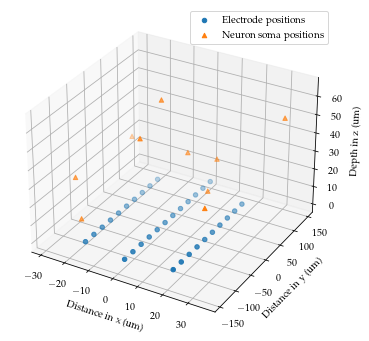

In [16]:
ax, fig = plot_electrodes_axons(neo_dicts[0]["recordings"])

In [17]:
from eapprocessor.plot import save_figure

In [18]:
FIGURE_FOLDER = "/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/thesis/images"
figure_path = Path(FIGURE_FOLDER)

In [19]:
save_figure(fig, figure_path / "electrodes_templates_positions.pdf", tight=False)

## Plot signals

In [20]:
from eapprocessor.plot.signals import plot_signals

In [21]:
neo_dicts[0]

{'adcinfo': {'resolution': 12, 'voltage_ref': 500},
 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f83d270b100>,
 'w': <HDF5 dataset "w": shape (4,), type "<i8">,
 'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">}

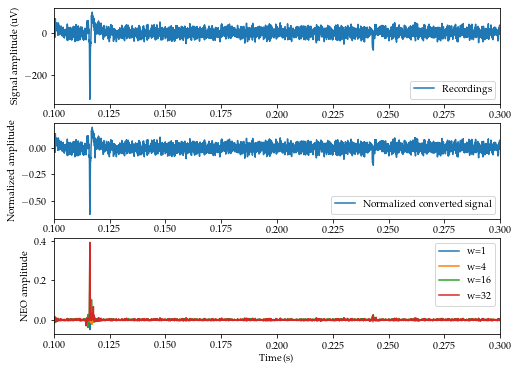

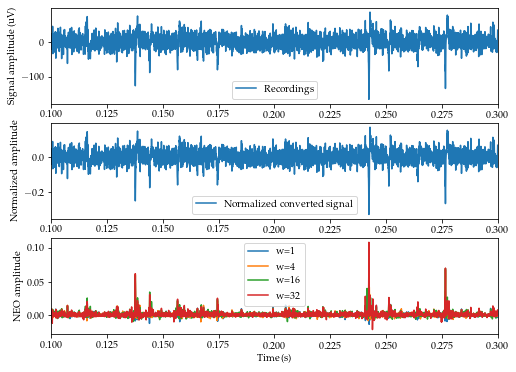

In [22]:
figure_list = plot_signals(neo_dicts[1], channels=[0,27], include_spiketrains=False, t_start=0.1, t_stop=0.3)

In [23]:
save_figure(figure_list[0], figure_path / "neo_results_channel_0_10uV.pdf")

In [24]:
save_figure(figure_list[1], figure_path / "neo_results_channel_27_10uV.pdf")

In [25]:
from eapprocessor.plot.signals import plot_transient_neo

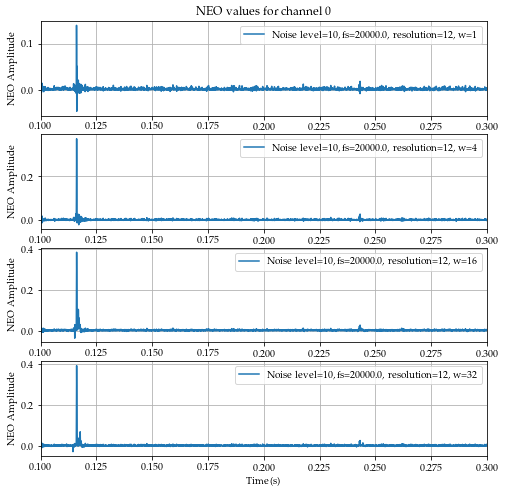

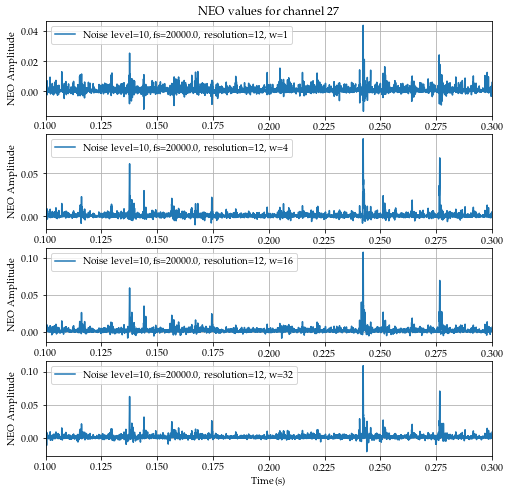

In [26]:
neo_figures = plot_transient_neo(neo_dicts[1], channels=[0,27], t_start=0.1, t_stop=0.3)

In [27]:
save_figure(neo_figures[1], figure_path / "neo_variation_27_10uV.pdf")

In [28]:
neo_files_th =  df[((df["lcadc"]==False) & (df["resolution"]==12) & 
                 (df["bw_ul"]==6000) & (df["fs"]==20000) & (df["noise_level"]==10))]["evaluator_file"].unique()

In [29]:
neo_files_th

array([PosixPath('/mnt/Data/data/output/evaluator/threshold_recordings_subset_50th_12_10uV_20000Hz_2022-08-08_14-00.h5'),
       PosixPath('/mnt/Data/data/output/evaluator/threshold_normalized_subset_50th_12_10uV_20000Hz_2022-08-08_14-00.h5'),
       PosixPath('/mnt/Data/data/output/evaluator/threshold_neo_subset_50th_12_10uV_20000Hz_2022-08-08_14-00.h5')],
      dtype=object)

In [30]:
neo_file = df[((df["lcadc"]==False) & (df["resolution"]==12) & 
                 (df["bw_ul"]==6000) & (df["fs"]==20000) & (df["noise_level"]==10))]["neo_file"].unique()

In [31]:
neo_file

array([PosixPath('/mnt/Data/data/output/preprocessor/preprocessed_neo_12_10uV_20000Hz_2022-08-08_09-08.h5')],
      dtype=object)

In [32]:
from eapprocessor.tools.load import load_evaluation

In [33]:
neo_dic,_ = load_neo(neo_file[0])

In [34]:
recordings_dict = load_evaluation(neo_files_th[0])
normalized_dict = load_evaluation(neo_files_th[1])
neo_dict = load_evaluation(neo_files_th[2])

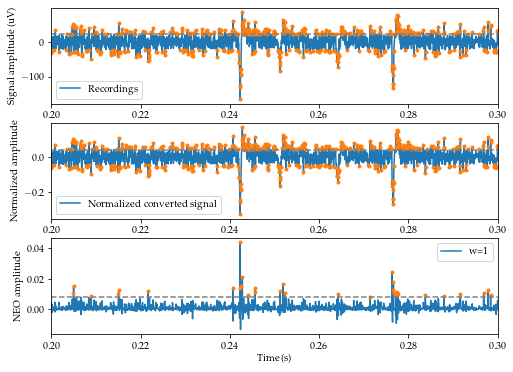

In [35]:
figure = plot_signals(neo_dic,channels=[27], t_start=0.2, t_stop=0.3,  neo_idx=[0], 
             include_threshold=True,
             #include_detected_spikes=True,
             include_spiketrains=False,
            th_recordings=recordings_dict,
            th_normalized=normalized_dict,
            th_neo=neo_dict,
            th_n=5)

In [36]:
save_figure(figure[0], figure_path / "neo_evaluation_27_10uV.pdf")

In [37]:
from eapprocessor.tools.load import  load_count_evaluation

In [38]:
counts = load_count_evaluation(
   recordings_file=neo_files_th[0],
normalized_file =neo_files_th[1],
    neo_file = neo_files_th[2]
   )

In [39]:
from eapprocessor.plot.evaluator import plot_counts_evaluator

In [40]:
neo_dic

{'adcinfo': {'resolution': 12, 'voltage_ref': 500},
 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f8449cbb490>,
 'w': <HDF5 dataset "w": shape (4,), type "<i8">,
 'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">}

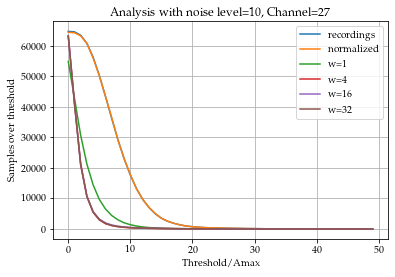

In [41]:
count_figure = plot_counts_evaluator(counts,neo_dic, channels_idx=[1])

In [42]:
save_figure(count_figure[0], figure_path / "evaluation_counts_27_10uV.pdf")

## Plot evaluation

In [43]:
evaluations = df[((df["lcadc"]==False) & (df["resolution"]==12) & 
                 (df["bw_ul"]==6000) & (df["fs"]==20000) & (df["noise_level"].isin([5,15])))]

In [44]:
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy
80,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 33, 'falsepositive': 3965, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...","[0.008254127063531767, 0.008254127063531767, 0..."
81,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...","[0.01225, 0.01225, 0.01225, 0.0122714750813924..."
82,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...","[0.01425, 0.01425, 0.01425, 0.0142642642642642..."
83,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...","[0.010997250687328168, 0.010997250687328168, 0..."
84,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16115,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9827586206896...","[0.999746063991874, 0.999746063991874, 0.98324...","[0.014518147684605758, 0.014518147684605758, 0..."
16116,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3940, '...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9827586206896551, ...","[1.0, 1.0, 0.9857868020304569, 0.8263959390862...","[0.014507253626813406, 0.014507253626813406, 0..."
16117,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 0.981651376146789, 0.9724...","[1.0, 1.0, 0.9845758354755784, 0.8313624678663...","[0.02725681420355089, 0.02725681420355089, 0.0..."
16118,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99285714...","[0.9997408655091993, 0.9997408655091993, 0.986...","[0.03501750875437719, 0.03501750875437719, 0.0..."


In [45]:
seval =evaluations[evaluations["spiketrain"].isin([5,7,8])].copy()
seval

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy
85,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0..."
87,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989717223650385, 0.87814910...","[0.02725681420355089, 0.02725681420355089, 0.0..."
88,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0..."
95,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0..."
97,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9987146529562982, 0.88329048...","[0.02725681420355089, 0.02725681420355089, 0.0..."
98,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0..."
125,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0..."
127,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999...","[0.02725681420355089, 0.02725681420355089, 0.0..."
128,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0..."
135,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'trueposit

In [46]:
seval["type"].unique()

array(['recordings', 'normalized', 'neo'], dtype=object)

In [47]:
seval.loc[:,("label")] = seval["type"].map({"recordings": "Recordings", "normalized":"Normalized", "neo":"Neo"})

In [48]:
seval.loc[seval["type"]=="neo",("label")] = seval.loc[seval["type"]=="neo",("w")].apply(lambda x:  f"w={x}")

In [49]:
seval

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label
85,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Recordings
87,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989717223650385, 0.87814910...","[0.02725681420355089, 0.02725681420355089, 0.0...",Recordings
88,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Recordings
95,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Normalized
97,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9987146529562982, 0.88329048...","[0.02725681420355089, 0.02725681420355089, 0.0...",Normalized
98,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Normalized
125,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Recordings
127,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999...","[0.02725681420355089, 0.02725681420355089, 0.0...",Recordings
128,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Recordings
135,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/

In [50]:
cat = seval[["noise_level","spiketrain"]].drop_duplicates()

In [51]:
cat

,noise_level,spiketrain
85,5,5
87,5,7
88,5,8
125,15,5
127,15,7
128,15,8


In [52]:
import matplotlib.pyplot as plt

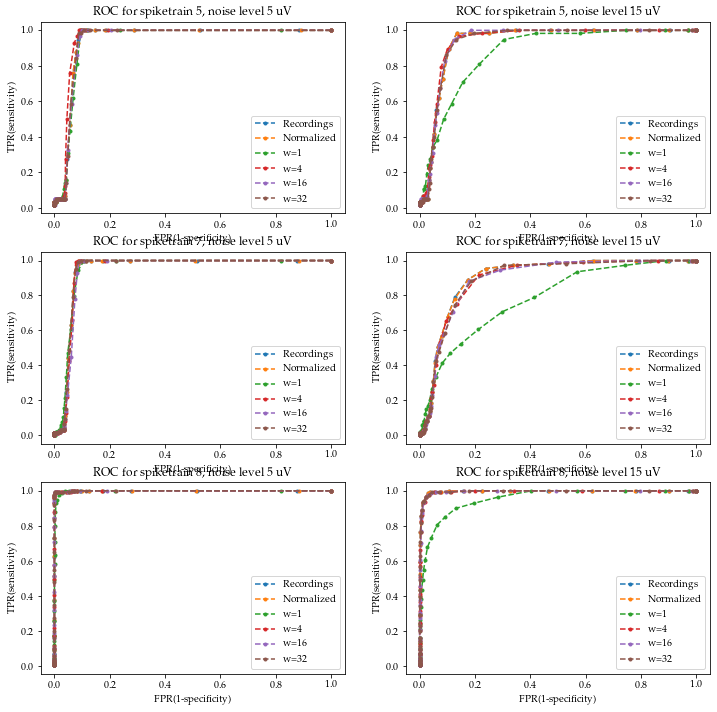

In [53]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(ncols=2,nrows=3)
cat["axes"] = axes.T.ravel()

for row in cat.itertuples(index=False):
    sel = seval[((seval["noise_level"]==row.noise_level)&(seval["spiketrain"]==row.spiketrain))]
    for srow in sel.itertuples(index=False):
        row.axes.plot(srow.fpr, srow.tpr, '--.', label=srow.label)
        row.axes.legend(loc="best")
        row.axes.set_xlabel("FPR(1-specificity)")
        row.axes.set_ylabel("TPR(sensitivity)")
        row.axes.set_title(f"ROC for spiketrain {row.spiketrain}, noise level {row.noise_level} uV")
plt.show()

In [54]:
seval

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label
85,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Recordings
87,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989717223650385, 0.87814910...","[0.02725681420355089, 0.02725681420355089, 0.0...",Recordings
88,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Recordings
95,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Normalized
97,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9987146529562982, 0.88329048...","[0.02725681420355089, 0.02725681420355089, 0.0...",Normalized
98,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Normalized
125,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Recordings
127,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999...","[0.02725681420355089, 0.02725681420355089, 0.0...",Recordings
128,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Recordings
135,6,6000,False,12,20000,15,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/

In [55]:
selected = seval[((seval["noise_level"]==5)& (seval["spiketrain"]==8))]
selected

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label
88,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Recordings
98,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Normalized
16008,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98571428...","[0.9997408655091993, 0.8186058564394921, 0.217...","[0.03501750875437719, 0.042437102152167325, 0....",w=1
16018,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9928571428571429, ...","[0.9997408655091993, 0.17102876392847888, 0.08...","[0.03501750875437719, 0.175, 0.311804008908686...",w=4
16028,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",16,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9928571428571...","[0.9997408655091993, 0.18890904379372894, 0.09...","[0.03501750875437719, 0.1611047180667434, 0.28...",w=16
16038,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9928571428571...","[0.9997408655091993, 0.22415133454262762, 0.11...","[0.03501750875437719, 0.13930348258706468, 0.2...",w=32


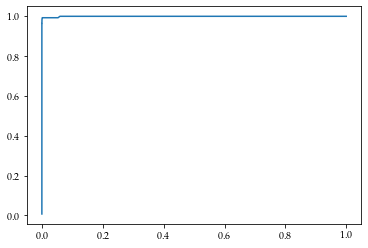

In [56]:
plt.plot(selected["fpr"].iloc[0],selected["tpr"].iloc[0])

In [57]:
selected["fpr"].iloc[0]

array([9.99740866e-01, 9.99740866e-01, 9.99740866e-01, 9.98963462e-01,
       8.77688520e-01, 5.16714175e-01, 2.76755636e-01, 1.74397512e-01,
       1.25421094e-01, 9.74345685e-02, 8.13682301e-02, 7.38533299e-02,
       7.04845815e-02, 6.89297746e-02, 6.68566986e-02, 6.45244882e-02,
       5.93417984e-02, 5.31225706e-02, 4.12023840e-02, 2.53951801e-02,
       1.39932625e-02, 6.73749676e-03, 3.88701736e-03, 1.29567245e-03,
       5.18268982e-04, 2.59134491e-04, 2.59134491e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [58]:
loaded_raw = pd.read_hdf(Path(BASE_DIR) / "results_raw.h5")

In [59]:
loaded_raw.head()

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results
0,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[[{'truepositive': 33, 'falsepositive': 3963, ..."
1,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[[{'truepositive': 33, 'falsepositive': 3963, ..."
2,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,neo,/mnt/Data/data/output/evaluator/threshold_neo_...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1, 4, 16, 32]",27,"[[[{'truepositive': 33, 'falsepositive': 3963,..."
3,1,6000,False,12,24000,10,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[[{'truepositive': 33, 'falsepositive': 3963, ..."
4,1,6000,False,12,24000,10,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[[{'truepositive': 33, 'falsepositive': 3963, ..."


In [60]:
loaded_raw.iloc[0]["results"]

array([[{'truepositive': 33, 'falsepositive': 3963, 'falsenegative': 0, 'truenegative': 0},
        {'truepositive': 49, 'falsepositive': 3951, 'falsenegative': 0, 'truenegative': 0},
        {'truepositive': 57, 'falsepositive': 3943, 'falsenegative': 0, 'truenegative': 0},
        {'truepositive': 44, 'falsepositive': 3957, 'falsenegative': 0, 'truenegative': 0},
        {'truepositive': 67, 'falsepositive': 3930, 'falsenegative': 0, 'truenegative': 1},
        {'truepositive': 58, 'falsepositive': 3937, 'falsenegative': 0, 'truenegative': 1},
        {'truepositive': 58, 'falsepositive': 3940, 'falsenegative': 0, 'truenegative': 0},
        {'truepositive': 109, 'falsepositive': 3891, 'falsenegative': 0, 'truenegative': 0},
        {'truepositive': 140, 'falsepositive': 3857, 'falsenegative': 0, 'truenegative': 1},
        {'truepositive': 158, 'falsepositive': 3841, 'falsenegative': 0, 'truenegative': 1}],
       [{'truepositive': 33, 'falsepositive': 3963, 'falsenegative': 0, 'tru

In [61]:
loaded_raw.iloc[0]["results"].shape

(50, 10)

In [62]:
from eapprocessor.evaluator.spikes import convert_to_roc

In [63]:
tpr, fpr = convert_to_roc(loaded_raw.iloc[0]["results"], range_reference=[5,7,8])

In [64]:
tpr.shape

(50, 3)

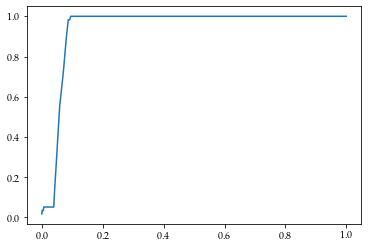

In [65]:
plt.plot(fpr[:,0],tpr[:,0])

### Generating again results with corrected spiketrains positions reference 
(legacy, included in generation consolidated)

In [ ]:
loaded_raw

In [ ]:
selected = loaded_raw[((loaded_raw["lcadc"]==False) & 
                       (loaded_raw["resolution"]==12) & 
                       (loaded_raw["bw_ul"]==6000) & 
                       (loaded_raw["fs"]==20000))].copy()
selected

In [ ]:
tmp = selected.drop_duplicates(["fs"])
tmp

In [ ]:
from eapprocessor.process import get_spiketrain_list

In [ ]:
spiketrain_list = get_spiketrain_list(tmp["neo_file"].iloc[0])

In [ ]:
spiketrain_list

In [ ]:
selected["spiketrain_list"] = [spiketrain_list]*len(selected)

In [ ]:
selected

In [ ]:
from eapprocessor.process import get_results_evaluation_dataset

In [ ]:
neo_files = selected["neo_file"]
evaluator_files = selected["evaluator_file"]
types = selected["type"]
lcadc = selected["lcadc"]
spiketrain_indexes_list = selected["spiketrain_list"]
TIME_WINDOW = 2.5e-3
channel_idx=1

In [ ]:
def wrapper_function(evaluator_file, neo_file, is_lcadc, current_type, spiketrain_indexes, i, total):
    print(f"Starting execution {i}/{total}")
    if current_type == "recordings":
        is_lcadc=False
    is_neo = (current_type == "neo")
    print(f"Evaluating with eval_file={evaluator_file}, type={current_type}")
    eval_result = get_results_evaluation_dataset(evaluator_file, 
                                     spiketrain_indexes,
                                     channel_idx=channel_idx,
                                     window_time=TIME_WINDOW,
                                     origin_file=neo_file,
                                     is_neo=is_neo,
                                     is_lcadc=is_lcadc)   
    print(f"Finished execution {i}/{total}")
    return eval_result

In [ ]:
from joblib import Parallel, delayed, cpu_count
n_jobs=8

In [ ]:
eval_results = Parallel(n_jobs=n_jobs, backend="threading")(
                delayed(wrapper_function)(evaluator_file, neo_file, is_lcadc, current_type, spiketrain_indexes, i, len(selected) )
                for evaluator_file, neo_file, is_lcadc, current_type, spiketrain_indexes, i in zip(evaluator_files, 
                                                               neo_files, 
                                                               lcadc, 
                                                               types, 
                                                               spiketrain_indexes_list,
                                                               range(len(selected))))

In [ ]:
selected["results"] = eval_results

In [ ]:
selected

In [ ]:
import numpy as np

In [ ]:
neo_rows = selected[selected["type"]=="neo"]
neo_exploded = neo_rows.explode(["w","results"])
only_rec_norm = selected[selected["type"].isin(["recordings","normalized"])]
exploded_df = pd.concat([only_rec_norm,neo_exploded],ignore_index=True)
exploded_df["results_transposed"] = exploded_df["results"].apply(lambda x: np.transpose(x))

In [ ]:
spiketrain_idx = list(range(len(exploded_df["results_transposed"].iloc[0])))
spiketrain_idx

In [ ]:
exploded_df["spiketrain"] = [spiketrain_idx]*len(exploded_df)
exploded_df.head()

In [ ]:
exploded_df["results"] = exploded_df["results_transposed"]
exploded_df.drop(columns=["results_transposed"], inplace=True)

In [ ]:
s_exploded_df = exploded_df.explode(["results","spiketrain"],ignore_index=True)
s_exploded_df

In [ ]:
df = s_exploded_df

In [ ]:
from eapprocessor.evaluator.spikes import convert_to_accuracy

In [ ]:
df["results_roc"] = df["results"].apply(lambda x: convert_to_roc(x))
df['tpr'] = df["results_roc"].apply(lambda x: x[0])
df['fpr'] = df["results_roc"].apply(lambda x: x[1])
df['accuracy'] = df["results"].apply(lambda x: convert_to_accuracy(x))
df.drop(columns="results_roc", inplace=True)
df

In [ ]:
plt.plot(df["fpr"].iloc[0],df["tpr"].iloc[0])

### Plotting results

In [66]:
df = loaded_metrics

In [71]:
df.columns

Index(['index', 'bw_ul', 'lcadc', 'resolution', 'fs', 'noise_level',
       'neo_file', 'type', 'evaluator_file', 'indexes_list', 'w',
       'channel_index', 'results', 'spiketrain', 'tpr', 'fpr', 'accuracy',
       'label'],
      dtype='object')

In [75]:
df["label"] = df["type"].map({"recordings": "Recordings", "normalized":"Normalized", "neo":"Neo"})
df.loc[df["type"]=="neo",("label")] = df.loc[df["type"]=="neo",("w")].apply(lambda x:  f"w={x}")

In [79]:
selected = df[((df["spiketrain"].isin([5,6,7,8])) & (df["noise_level"].isin([5,25])) 
               & (df["fs"]==20000) & (df["bw_ul"]==6000) & (df["resolution"]==12) & (df["lcadc"]==False))].copy()

In [80]:
cat = selected[["noise_level","spiketrain"]].drop_duplicates()
cat

,noise_level,spiketrain
85,5,5
86,5,6
87,5,7
88,5,8
145,25,5
146,25,6
147,25,7
148,25,8


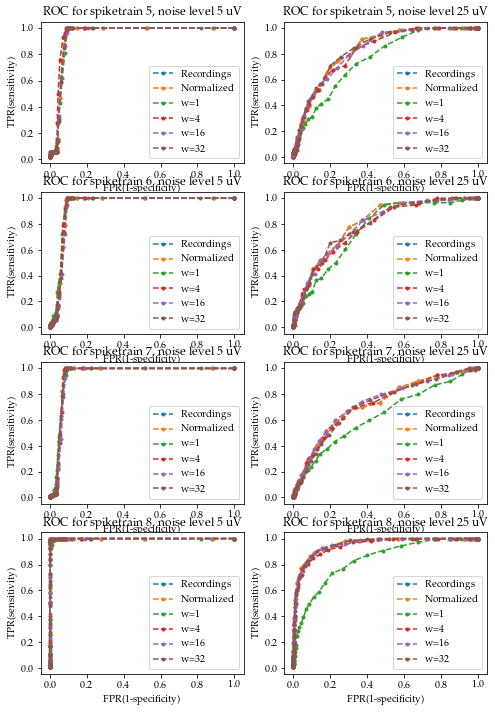

In [82]:
fig = plt.figure(figsize=(8,12))
axes = fig.subplots(ncols=2,nrows=4)
axes =  axes.transpose()
cat["axes"] = axes.ravel()

for row in cat.itertuples(index=False):
    sel = selected[((selected["noise_level"]==row.noise_level)&(selected["spiketrain"]==row.spiketrain))]
    for srow in sel.itertuples(index=False):
        row.axes.plot(srow.fpr, srow.tpr, '.--',label=srow.label)
    row.axes.legend()
    row.axes.set_xlabel("FPR(1-specificity)")
    row.axes.set_ylabel("TPR(sensitivity)")
    row.axes.set_title(f"ROC for spiketrain {row.spiketrain}, noise level {row.noise_level} uV")
        
plt.show()

In [83]:
save_figure(fig, figure_path / "evaluation_neo_noise.pdf")

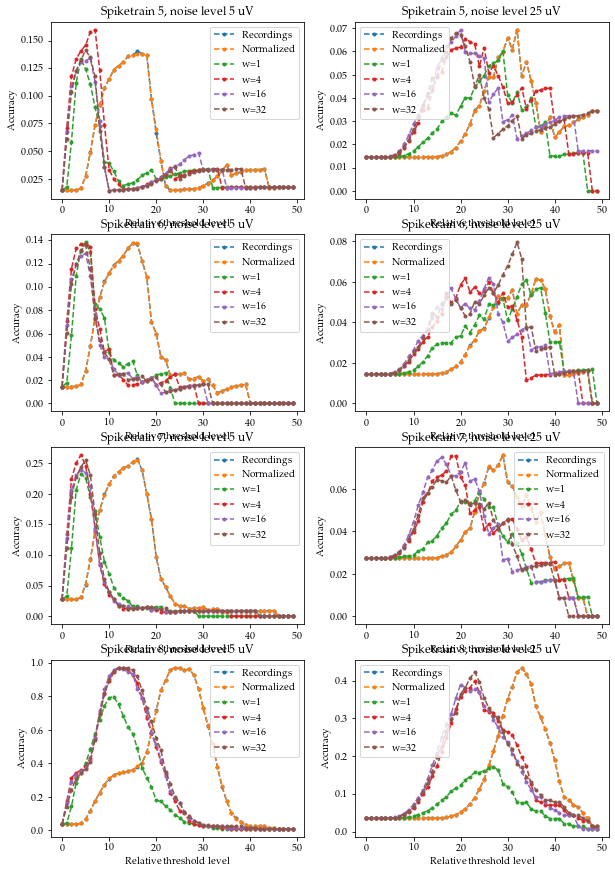

In [84]:
fig = plt.figure(figsize=(10,15))
axes = fig.subplots(ncols=2,nrows=4)
axes =  axes.transpose()
cat["axes"] = axes.ravel()

for row in cat.itertuples(index=False):
    sel = selected[((selected["noise_level"]==row.noise_level)&(selected["spiketrain"]==row.spiketrain))]
    for srow in sel.itertuples(index=False):
        row.axes.plot(range(len(srow.accuracy)), srow.accuracy, '.--',label=srow.label)
    row.axes.legend()
    row.axes.set_xlabel("Relative threshold level")
    row.axes.set_ylabel("Accuracy")
    row.axes.set_title(f"Spiketrain {row.spiketrain}, noise level {row.noise_level} uV")
        
plt.show()

In [85]:
save_figure(fig, figure_path / "evaluation_neo_accuracy_noise.pdf")

### Obtain maximum accuracies to compare variants

In [89]:
import numpy as np

In [90]:
df["max_accuracy"] = df["accuracy"].apply(lambda x: np.max(x))

In [301]:
n_sel = df[((df["noise_level"]==5)&(df["type"]=="recordings"))].copy()
n_sel

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,w,channel_index,results,spiketrain_list,spiketrain,tpr,fpr,label,accuracy,max_accuracy
0,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 33, 'falsepositive': 3965, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...",Recordings,"[0.008254127063531767, 0.008254127063531767, 0...",0.078571
1,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 49, 'falsepositive': 3951, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...",Recordings,"[0.01225, 0.01225, 0.01225, 0.0122714750813924...",0.020408
2,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 57, 'falsepositive': 3943, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...",Recordings,"[0.01425, 0.01425, 0.01425, 0.0142642642642642...",0.037159
3,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 44, 'falsepositive': 3957, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...",Recordings,"[0.010997250687328168, 0.010997250687328168, 0...",0.043373
4,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 67, 'falsepositive': 3930, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...",Recordings,"[0.01676257192894671, 0.01676257192894671, 0.0...",0.082603
5,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...",Recordings,"[0.014518147684605758, 0.014518147684605758, 0...",0.140306
6,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 58, 'falsepositive': 3940, '...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9974619289340102, 0.88426395...",Recordings,"[0.014507253626813406, 0.014507253626813406, 0...",0.137349
7,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989717223650385, 0.87814910...",Recordings,"[0.02725681420355089, 0.02725681420355089, 0.0...",0.257576
8,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...",Recordings,"[0.03501750875437719, 0.03501750875437719, 0.0...",0.971831
9,4,6000,False,12,20000

In [343]:
evaluators = n_sel[["results","spiketrain"]].copy()
evaluators

,results,spiketrain
0,"[{'truepositive': 33, 'falsepositive': 3965, '...",0
1,"[{'truepositive': 49, 'falsepositive': 3951, '...",1
2,"[{'truepositive': 57, 'falsepositive': 3943, '...",2
3,"[{'truepositive': 44, 'falsepositive': 3957, '...",3
4,"[{'truepositive': 67, 'falsepositive': 3930, '...",4
5,"[{'truepositive': 58, 'falsepositive': 3937, '...",5
6,"[{'truepositive': 58, 'falsepositive': 3940, '...",6
7,"[{'truepositive': 109, 'falsepositive': 3890, ...",7
8,"[{'truepositive': 140, 'falsepositive': 3858, ...",8
9,"[{'truepositive': 158, 'falsepositive': 3841, ...",9


In [344]:
evaluators["th_level"] = [list(range(50))]*len(evaluators)

In [345]:
evals = evaluators.explode(["results","th_level"],ignore_index=True)

In [346]:
evals

,results,spiketrain,th_level
0,"{'truepositive': 33, 'falsepositive': 3965, 'f...",0,0
1,"{'truepositive': 33, 'falsepositive': 3965, 'f...",0,1
2,"{'truepositive': 33, 'falsepositive': 3965, 'f...",0,2
3,"{'truepositive': 33, 'falsepositive': 3961, 'f...",0,3
4,"{'truepositive': 33, 'falsepositive': 3502, 'f...",0,4
...,...,...,...
495,"{'truepositive': 0, 'falsepositive': 2, 'false...",9,45
496,"{'truepositive': 0, 'falsepositive': 1, 'false...",9,46
497,"{'truepositive': 0, 'falsepositive': 1, 'false...",9,47
498,"{'truepositive': 0, 'falsepositive': 1, 'false...",9,48


In [348]:
evals[evals["th_level"]==5]

,results,spiketrain,th_level
5,"{'truepositive': 33, 'falsepositive': 2089, 'f...",0,5
55,"{'truepositive': 30, 'falsepositive': 2104, 'f...",1,5
105,"{'truepositive': 57, 'falsepositive': 2060, 'f...",2,5
155,"{'truepositive': 44, 'falsepositive': 2093, 'f...",3,5
205,"{'truepositive': 67, 'falsepositive': 2053, 'f...",4,5
255,"{'truepositive': 58, 'falsepositive': 2077, 'f...",5,5
305,"{'truepositive': 58, 'falsepositive': 2036, 'f...",6,5
355,"{'truepositive': 109, 'falsepositive': 1998, '...",7,5
405,"{'truepositive': 140, 'falsepositive': 1994, '...",8,5
455,"{'truepositive': 154, 'falsepositive': 1964, '...",9,5


In [354]:
sample = evals["results"][0]
list(sample.keys())

['truepositive', 'falsepositive', 'falsenegative', 'truenegative']

In [355]:
evals[list(sample.keys())] = pd.DataFrame(evals["results"].to_list())

In [356]:
evals

,results,spiketrain,th_level,truepositive,falsepositive,falsenegative,truenegative
0,"{'truepositive': 33, 'falsepositive': 3965, 'f...",0,0,33,3965,0,0
1,"{'truepositive': 33, 'falsepositive': 3965, 'f...",0,1,33,3965,0,0
2,"{'truepositive': 33, 'falsepositive': 3965, 'f...",0,2,33,3965,0,0
3,"{'truepositive': 33, 'falsepositive': 3961, 'f...",0,3,33,3961,0,4
4,"{'truepositive': 33, 'falsepositive': 3502, 'f...",0,4,33,3502,0,463
...,...,...,...,...,...,...,...
495,"{'truepositive': 0, 'falsepositive': 2, 'false...",9,45,0,2,158,3840
496,"{'truepositive': 0, 'falsepositive': 1, 'false...",9,46,0,1,158,3841
497,"{'truepositive': 0, 'falsepositive': 1, 'false...",9,47,0,1,158,3841
498,"{'truepositive': 0, 'falsepositive': 1, 'false...",9,48,0,1,158,3841


In [367]:
sel_eval = evals[evals["th_level"]==15].copy()

In [368]:
from eapprocessor.plot.evaluator import plot_accuracy_evaluator

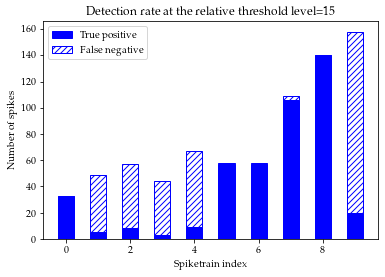

In [391]:
fig = plot_accuracy_evaluator(sel_eval["truepositive"],sel_eval["falsenegative"],th_level=15)

In [392]:
save_figure(fig, figure_path / "accuracy_spiketrains.pdf")

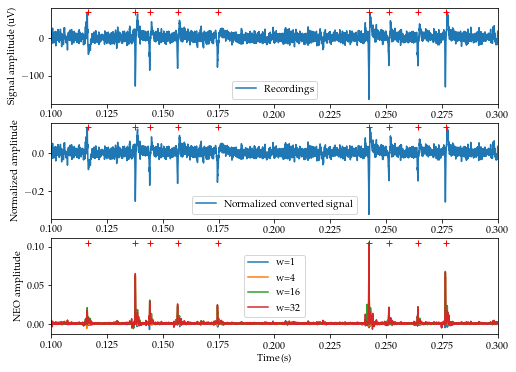

In [395]:
figure_list = plot_signals(neo_dicts[0], channels=[27], t_start=0.1, t_stop=0.3, range_spikes=[0,5,6,7,8])

In [396]:
save_figure(figure_list[0], figure_path / "spiketrains_over_signal.pdf")

In [94]:
selected

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label
85,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Recordings
86,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3940, '...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9974619289340102, 0.88426395...","[0.014507253626813406, 0.014507253626813406, 0...",Recordings
87,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989717223650385, 0.87814910...","[0.02725681420355089, 0.02725681420355089, 0.0...",Recordings
88,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Recordings
95,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Normalized
96,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3940, '...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9974619289340102, 0.88832487...","[0.014507253626813406, 0.014507253626813406, 0...",Normalized
97,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9987146529562982, 0.88329048...","[0.02725681420355089, 0.02725681420355089, 0.0...",Normalized
98,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.03501750875437719, 0.0...",Normalized
145,7,6000,False,12,20000,25,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",Recordings
146,7,6000,False,12,20000,25,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/outp

In [95]:
selected = df[((df["spiketrain"].isin([5,6,7,8])) 
               & (df["fs"]==20000) & (df["bw_ul"]==6000) & (df["resolution"]==12) & (df["lcadc"]==False))].copy()

In [96]:
#https://stackoverflow.com/a/52530736/5107192

In [99]:
grouped =selected.groupby(["spiketrain","label"]).agg({'resolution':'first','w':'first', 
                              'max_accuracy': lambda x: x.tolist(),
                              'noise_level': lambda x: x.tolist()})

In [100]:
grouped

resolution   w  \
spiketrain label                        
5          Normalized          12   0   
           Recordings          12   0   
           w=1                 12   1   
           w=16                12  16   
           w=32                12  32   
           w=4                 12   4   
6          Normalized          12   0   
           Recordings          12   0   
           w=1                 12   1   
           w=16                12  16   
           w=32                12  32   
           w=4                 12   4   
7          Normalized          12   0   
           Recordings          12   0   
           w=1                 12   1   
           w=16                12  16   
           w=32                12  32   
           w=4                 12   4   
8          Normalized          12   0   
           Recordings          12   0   
           w=1                 12   1   
           w=16                12  16   
           w=32                12  32   
           w=4                 12   4   

                                                            max_accuracy  \
spiketrain label                                                           
5          Normalized  [0.13821138211382114, 0.14488636363636365, 0.1...   
           Recordings  [0.14030612244897958, 0.14447592067988668, 0.1...   
           w=1         [0.13302752293577982, 0.11586901763224182, 0.0...   
           w=16        [0.13404825737265416, 0.13742690058479531, 0.1...   
           w=32        [0.14108910891089108, 0.13609467455621302, 0.1...   
           w=4         [0.16, 0.14627659574468085, 0.1260273972602739...   
6          Normalized  [0.13740458015267176, 0.1282051282051282, 0.09...   
           Recordings  [0.13734939759036144, 0.1282051282051282, 0.09...   
           w=1         [0.13829787234042554, 0.0996309963099631, 0.07...   
           w=16        [0.1288056206088993, 0.12121212121212122, 0.08...   
           w=32        [0.13580246913580246, 0.1206896551724138, 0.08...   
           w=4         [0.13695090439276486, 0.13020833333333334, 0.0...   
7          Normalized  [0.25569620253164554, 0.23094688221709006, 0.1...   
           Recordings  [0.25757575757575757, 0.23094688221709006, 0.1...   
           w=1         [0.23198198198198197, 0.14942528735632185, 0.1...   
           w=16        [0.23893805309734514, 0.210412147505423, 0.146...   
           w=32        [0.2549019607843137, 0.225531914893617, 0.1373...   
           w=4         [0.2634146341463415, 0.234192037470726, 0.1479...   
8          Normalized  [0.971830985915493, 0.87248322147651, 0.75, 0....   
           Recordings  [0.971830985915493, 0.8791946308724832, 0.75, ...   
           w=1         [0.7987012987012987, 0.5628140703517588, 0.394...   
           w=16        [0.971830985915493, 0.8506493506493507, 0.7261...   
           w=32        [0.971830985915493, 0.869281045751634, 0.72727...   
           w=4         [0.971830985915493, 0.85, 0.7289156626506024, ...   

                           noise_level  
spiketrain label                        
5          Normalized  [5, 10, 15, 25]  
           Recordings  [5, 10, 15, 25]  
           w=1         [5, 10, 15, 25]  
           w=16        [5, 10, 15, 25]  
           w=32        [5, 10, 15, 25]  
           w=4         [5, 10, 15, 25]  
6          Normalized  [5, 10, 15, 25]  
           Recordings  [5, 10, 15, 25]  
           w=1         [5, 10, 15, 25]  
           w=16        [5, 10, 15, 25]  
           w=32        [5, 10, 15, 25]  
           w=4         [5, 10, 15, 25]  
7          Normalized  [5, 10, 15, 25]  
           Recordings  [5, 10, 15, 25]  
           w=1         [5, 10, 15, 25]  
           w=16        [5, 10, 15, 25]  
           w=32        [5, 10, 15, 25]  
           w=4         [5, 10, 15, 25]  
8          Normalized  [5, 10, 15, 25]  
           Recordings  [5, 10, 15, 25]  
           w=1         [5, 10, 15, 25]  
           w=16        [5, 10, 15, 2

In [101]:
grouped.index.levels

FrozenList([[5, 6, 7, 8], ['Normalized', 'Recordings', 'w=1', 'w=16', 'w=32', 'w=4']])

In [102]:
labels = np.array(grouped.index.levels[1])

In [103]:
labels = labels[[1,0,2,5,3,4]]

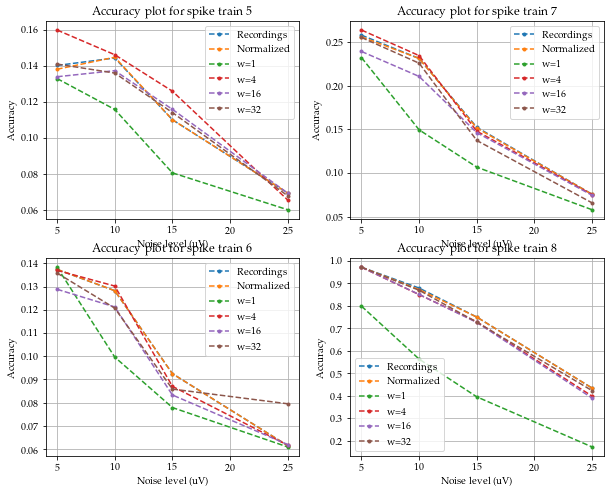

In [104]:
fig = plt.figure(figsize=(10,8))
axes = fig.subplots(ncols=2,nrows=2)
axes =  axes.transpose()

for ax, index in zip(axes.ravel(), list([5,6,7,8])):
    for label in labels:
        ndf = grouped.loc[(index,label)]
        ax.plot(ndf["noise_level"], ndf["max_accuracy"], '.--', label=label)
    ax.legend(loc="best")
    ax.grid()
    ax.set_xlabel("Noise level (uV)")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Accuracy plot for spike train {index}")

In [105]:
save_figure(fig, figure_path / "accuracy_vs_noise_level.pdf")

In [491]:
neo_file = df[((df["lcadc"]==False) & (df["resolution"]==12) & 
                 (df["bw_ul"]==6000) & (df["fs"]==20000) & (df["noise_level"]==5))]["neo_file"].unique()

In [492]:
neo_file

array([PosixPath('/mnt/Data/data/output/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-12-02_17-29.h5')],
      dtype=object)

In [493]:
neo_dic,_ = load_neo(neo_file[0])

In [494]:
neo_dic

{'adcinfo': {'resolution': 12, 'voltage_ref': 500},
 'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
 'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7fecea50c5b0>,
 'w': <HDF5 dataset "w": shape (4,), type "<i8">,
 'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">}

In [495]:
neo_dic["recordings"].recordings

<HDF5 dataset "recordings": shape (200000, 32), type "<f4">

In [496]:
neo_dic["recordings"].info

{'cell_types': {'excitatory': ['PC', 'SS', 'SP'],
  'inhibitory': ['AC', 'BP', 'BC', 'BTC', 'ChC', 'DBC', 'MC', 'NGC']},
 'electrodes': {'description': 'Neuronexus A1x32-Poly3-5mm-25s-177-CM32 probe. 32 circular contacts in 3 staggered columns.',
  'dim': [10, 12, 10],
  'electrode_name': 'Neuronexus-32',
  'pitch': [25.0, 18.0],
  'plane': 'yz',
  'shape': 'circle',
  'size': 7.5,
  'sortlist': None,
  'stagger': -12.5,
  'type': 'mea'},
 'recordings': {'angle_tol': 15,
  'bursting': False,
  'bursting_units': None,
  'chunk_duration': 0,
  'color_noise_floor': 1,
  'color_peak': 300,
  'color_q': 2,
  'drift_mode': 'slow',
  'drifting': False,
  'dtype': 'float32',
  'duration': 10.0,
  'exp_decay': 0.2,
  'extract_waveforms': False,
  'far_neurons_exc_inh_ratio': 0.8,
  'far_neurons_max_amp': 10,
  'far_neurons_n': 300,
  'far_neurons_noise_floor': 0.5,
  'fast_drift_max_jump': 20,
  'fast_drift_min_jump': 5,
  'fast_drift_period': 10,
  'filter': True,
  'filter_cutoff': [300, 6000

In [497]:
recordings = np.array(neo_dic["recordings"].recordings)

In [498]:
recordings.shape

(200000, 32)

In [499]:
channel_27 = recordings.T[27]

In [500]:
channel_27

array([ 2.3110626 ,  9.914375  ,  1.8437628 , ..., -6.0165367 ,
       -9.136471  ,  0.34767586], dtype=float32)

In [501]:
spiketrain_list = get_spiketrain_list(neo_file[0])

In [502]:
spiketrain_list.shape

(10, 200000)

In [503]:
ranges  = np.array([ channel_27[spiketrain_indexes>0] for spiketrain_indexes in spiketrain_list], dtype=object)

In [504]:
selected = ranges[[5,6,7,8]]
selected

array([array([-53.04525 , -61.883522, -55.880905, -78.383   , -72.54243 ,
              -67.28606 , -67.09861 , -60.771988, -47.32077 , -68.91823 ,
              -61.06119 , -57.094696, -58.12853 , -51.367954, -71.89545 ,
              -69.32537 , -49.37167 , -44.908924, -56.452232, -63.23274 ,
              -46.48478 , -55.331497, -81.28428 , -43.745457, -69.089066,
              -43.34607 , -80.43327 , -60.113052, -61.78462 , -63.471115,
              -45.401817, -46.26606 , -50.395668, -72.875626, -63.194534,
              -61.162697, -58.9992  , -47.045135, -53.02852 , -50.428772,
              -60.210674, -58.027763, -71.90031 , -82.9101  , -68.843216,
              -62.61766 , -76.595345, -69.622215, -65.53346 , -38.168888,
              -59.44706 , -38.568737, -67.33418 , -56.184784, -66.426414,
              -71.46924 , -54.054756, -56.16741 ], dtype=float32)        ,
       array([-6.0545626e+00,  2.8407676e+00, -7.0674995e+01, -2.1616064e+01,
              -4.2986517e+00, -7.

In [505]:
vfunc = np.vectorize(lambda x: np.mean(np.abs(x)))

In [506]:
mean_level = vfunc(selected)
mean_level

array([ 60.240223,  14.8229  ,  75.55108 , 108.792725], dtype=float32)

In [516]:
snr = 20*np.log10(mean_level/15)

In [517]:
snr

array([12.075907  , -0.10316162, 14.042988  , 17.21017   ], dtype=float32)

## Plot evaluation other variants

In [106]:
import numpy as np

In [123]:
df.columns

Index(['index', 'bw_ul', 'lcadc', 'resolution', 'fs', 'noise_level',
       'neo_file', 'type', 'evaluator_file', 'indexes_list', 'w',
       'channel_index', 'results', 'spiketrain', 'tpr', 'fpr', 'accuracy',
       'label', 'max_accuracy'],
      dtype='object')

In [107]:
df["max_accuracy"] = df["accuracy"].apply(np.max)
df.head()

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
0,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 33, 'falsepositive': 3963, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9947009841029523, 0.78147867...","[0.008258258258258258, 0.008258258258258258, 0...",Recordings,0.075862
1,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.551...","[1.0, 1.0, 1.0, 0.9946848899012908, 0.77980258...","[0.01225, 0.01225, 0.01225, 0.0123146519225936...",Recordings,0.020408
2,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9649122807017544, ...","[1.0, 1.0, 1.0, 0.9939132640121735, 0.77098655...","[0.01425, 0.01425, 0.01425, 0.0143360160965794...",Recordings,0.038423
3,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9545454545454...","[1.0, 1.0, 1.0, 0.9944402324993682, 0.77659843...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.042857
4,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9850746268656...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.086471


In [108]:
df["label"] = df["type"].map({"recordings": "Recordings", "normalized":"Normalized", "neo":"Neo"})

In [109]:
df.loc[df["type"]=="neo",("label")] = df.loc[df["type"]=="neo",("w")].apply(lambda x:  f"w={x}")

In [110]:
evaluations = df[((df["resolution"]==12) & 
                  (df["bw_ul"]==6000) & (df["fs"]==20000) & 
                  (df["noise_level"].isin([5,25])))]
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
80,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 33, 'falsepositive': 3965, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...","[0.008254127063531767, 0.008254127063531767, 0...",Recordings,0.078571
81,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...","[0.01225, 0.01225, 0.01225, 0.0122714750813924...",Recordings,0.020408
82,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...","[0.01425, 0.01425, 0.01425, 0.0142642642642642...",Recordings,0.037159
83,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.043373
84,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.082603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21435,139,6000,True,12,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",w=32,0.067925
21436,139,6000,True,12,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3940, '...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.982...","[1.0, 1.0, 1.0, 1.0, 0.998730964467005, 0.9862...","[0.014507253626813406, 0.014507253626813406, 0...",w=32,0.072917
21437,139,6000,True,12,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98165137...","[1.0, 1.0, 1.0, 1.0, 0.9992287917737789, 0.987...","[0.02725681420355089, 0.02725681420355089, 0.0...",w=32,0.068558
21438,139,6000,True,12,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.035017

In [111]:
grouped = evaluations.set_index(["spiketrain", "noise_level", "lcadc"]).sort_index()

In [112]:
head_values = evaluations[["noise_level","lcadc"]].drop_duplicates()
head_values

,noise_level,lcadc
80,5,False
140,25,False
2720,5,True
2780,25,True


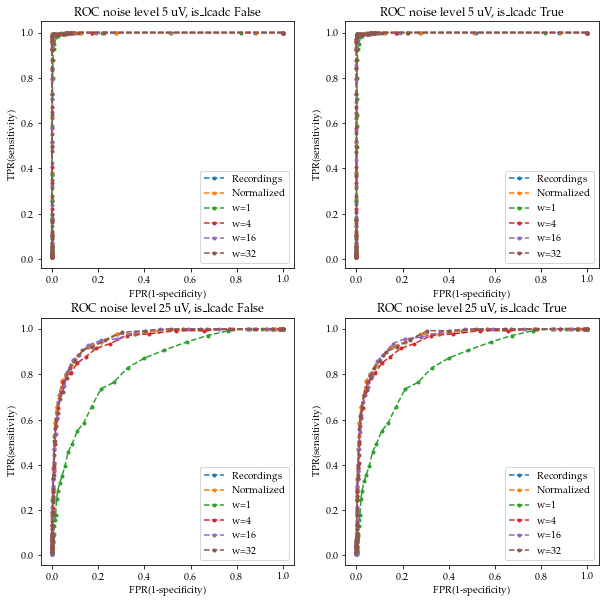

In [113]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(ncols=2,nrows=2)
spiketrain= 8

for head, ax in zip(head_values.values.tolist(), ax.T.ravel()):
    sel = grouped.loc[(spiketrain,*head)]
    for srow in sel.itertuples(index=False):
        ax.plot(srow.fpr, srow.tpr, '.--',label=srow.label)
    ax.legend()
    ax.set_xlabel("FPR(1-specificity)")
    ax.set_ylabel("TPR(sensitivity)")
    ax.set_title(f"ROC noise level {head[0]} uV, is_lcadc {head[1]}")

In [114]:
evaluations = df[((df["resolution"]==8) & 
                  (df["bw_ul"]==6000) & (df["fs"]==20000) & 
                  (df["noise_level"].isin([5,25])))]

In [115]:
grouped = evaluations.set_index(["spiketrain", "noise_level", "lcadc"]).sort_index()
head_values = evaluations[["noise_level","lcadc"]].drop_duplicates()

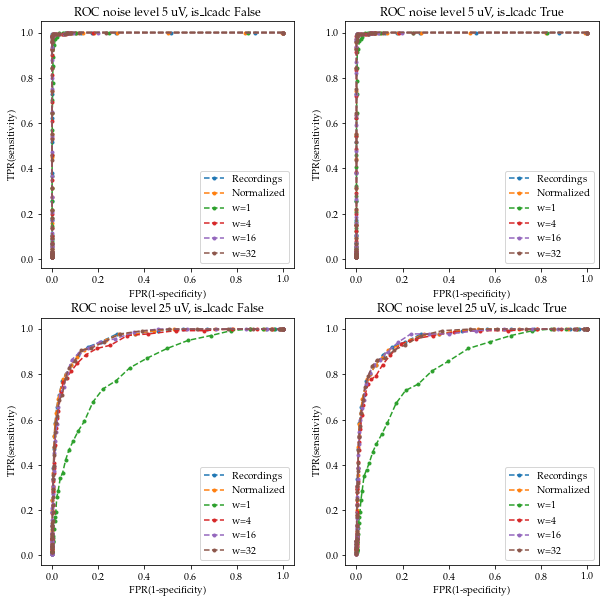

In [116]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(ncols=2,nrows=2)
spiketrain= 8

for head, ax in zip(head_values.values.tolist(), ax.T.ravel()):
    sel = grouped.loc[(spiketrain,*head)]
    for srow in sel.itertuples(index=False):
        ax.plot(srow.fpr, srow.tpr, '.--',label=srow.label)
    ax.legend()
    ax.set_xlabel("FPR(1-specificity)")
    ax.set_ylabel("TPR(sensitivity)")
    ax.set_title(f"ROC noise level {head[0]} uV, is_lcadc {head[1]}")

In [117]:
evaluations = df[((df["bw_ul"]==6000) & (df["fs"]==20000) & 
                  (df["noise_level"].isin([5,25])))].copy()
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
80,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 33, 'falsepositive': 3965, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...","[0.008254127063531767, 0.008254127063531767, 0...",Recordings,0.078571
81,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...","[0.01225, 0.01225, 0.01225, 0.0122714750813924...",Recordings,0.020408
82,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...","[0.01425, 0.01425, 0.01425, 0.0142642642642642...",Recordings,0.037159
83,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.043373
84,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.082603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26235,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00025393600812595224, 0.0002539360081259522...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
26236,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002538071065989848, 0.0002538071065989848,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
26237,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002570694087403599, 0.0002570694087403599,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
26238,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002591344908007256, 0.0002591344908007256,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [118]:
evaluations.loc[evaluations["type"]=="recordings", ("w")] = -1
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
80,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 33, 'falsepositive': 3965, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...","[0.008254127063531767, 0.008254127063531767, 0...",Recordings,0.078571
81,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...","[0.01225, 0.01225, 0.01225, 0.0122714750813924...",Recordings,0.020408
82,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...","[0.01425, 0.01425, 0.01425, 0.0142642642642642...",Recordings,0.037159
83,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.043373
84,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.082603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26235,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00025393600812595224, 0.0002539360081259522...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
26236,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002538071065989848, 0.0002538071065989848,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
26237,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002570694087403599, 0.0002570694087403599,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
26238,259,6000,True,1,20000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002591344908007256, 0.0002591344908007256,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [119]:
grouped = evaluations.groupby(["spiketrain","noise_level", "lcadc", "w"]).agg({'label':'first', 
                              'max_accuracy': lambda x: x.tolist(),
                              'resolution': lambda x: x.tolist()})

In [120]:
head_values = grouped.loc[(8,)].reset_index()[["noise_level","lcadc"]].drop_duplicates()

In [121]:
import matplotlib.pyplot as plt

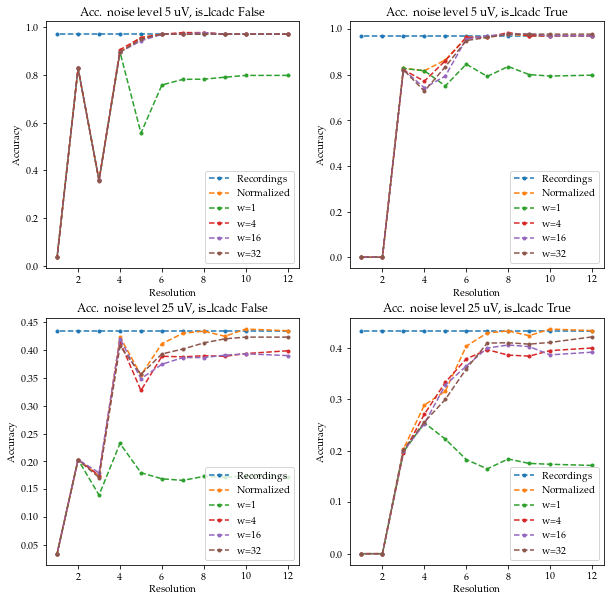

In [122]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(ncols=2,nrows=2)
spiketrain= 8

for head, ax in zip(head_values.values.tolist(), ax.ravel()):
    sel = grouped.loc[(spiketrain,*head,)]
    for srow in sel.itertuples(index=False):
        ax.plot(srow.resolution, srow.max_accuracy, '.--',label=srow.label)
    ax.legend()
    ax.set_xlabel("Resolution")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Acc. noise level {head[0]} uV, is_lcadc {head[1]}")

In [124]:
evaluations = df[((df["resolution"]==12) & (df["fs"]==20000) & 
                  (df["noise_level"].isin([5,25])))].copy()
evaluations.loc[evaluations["type"]=="recordings", ("w")] = -1
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
80,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 33, 'falsepositive': 3965, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...","[0.008254127063531767, 0.008254127063531767, 0...",Recordings,0.078571
81,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...","[0.01225, 0.01225, 0.01225, 0.0122714750813924...",Recordings,0.020408
82,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...","[0.01425, 0.01425, 0.01425, 0.0142642642642642...",Recordings,0.037159
83,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.043373
84,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.082603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42555,667,1000,True,12,20000,25,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3937, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.982...","[0.999746063991874, 0.999746063991874, 0.99974...","[0.014518147684605758, 0.014518147684605758, 0...",w=32,0.094086
42556,667,1000,True,12,20000,25,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3940, '...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9827586206896...","[1.0, 1.0, 1.0, 0.9964467005076142, 0.95532994...","[0.014507253626813406, 0.014507253626813406, 0...",w=32,0.071979
42557,667,1000,True,12,20000,25,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 109, 'falsepositive': 3890, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9908256880733946, ...","[1.0, 1.0, 1.0, 0.9976863753213367, 0.95784061...","[0.02725681420355089, 0.02725681420355089, 0.0...",w=32,0.100719
42558,667,1000,True,12,20000,25,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.9997408655091993, 0.999...","[0.03501750875437719, 0.0

In [125]:
grouped = evaluations.groupby(["spiketrain","noise_level", "lcadc", "w"]).agg({'label':'first', 
                              'max_accuracy': lambda x: x.tolist(),
                              'bw_ul': lambda x: x.tolist()})
grouped

label  \
spiketrain noise_level lcadc w                 
0          5           False -1   Recordings   
                              0   Normalized   
                              1          w=1   
                              4          w=4   
                              16        w=16   
...                                      ...   
9          25          True   0   Normalized   
                              1          w=1   
                              4          w=4   
                              16        w=16   
                              32        w=32   

                                                                       max_accuracy  \
spiketrain noise_level lcadc w                                                        
0          5           False -1   [0.07857142857142857, 0.07783018867924528, 0.0...   
                              0   [0.07857142857142857, 0.07783018867924528, 0.0...   
                              1   [0.06696428571428571, 0.06896551724137931, 0.0...   
                              4   [0.07600950118764846, 0.07600950118764846, 0.0...   
                              16  [0.07236842105263158, 0.07339449541284404, 0.075]   
...                                                                             ...   
9          25          True   0   [0.050239234449760764, 0.050335570469798654, 0...   
                              1   [0.044534412955465584, 0.043355325164938736, 0...   
                              4   [0.04744525547445255, 0.05390070921985816, 0.0...   
                              16  [0.051685393258426963, 0.05, 0.047619047619047...   
                              32  [0.05275779376498801, 0.04938271604938271, 0.0...   

                                               bw_ul  
spiketrain noise_level lcadc w                        
0          5           False -1   [6000, 3000, 1000]  
                              0   [6000, 3000, 1000]  
                              1   [6000, 3000, 1000]  
                              4   [6000, 3000, 1000]  
                              16  [6000, 3000, 1000]  
...                                              ...  
9          25          True   0   [6000, 3000, 1000]  
                              1   [6000, 3000, 1000]  
                              4   [6000, 3000, 1000]  
                              16  [6000, 3000, 1000]  
                              32  [6000, 3000, 1000]  

[240 rows x 3 columns]

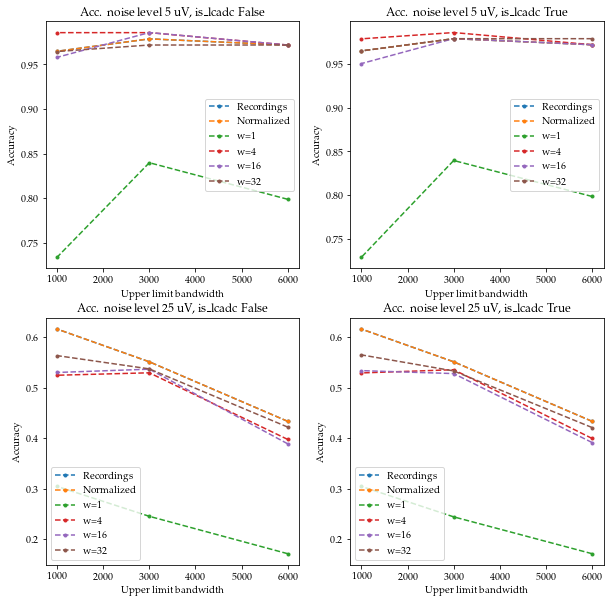

In [126]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(ncols=2,nrows=2)
spiketrain= 8

for head, ax in zip(head_values.values.tolist(), ax.ravel()):
    sel = grouped.loc[(spiketrain,*head,)]
    for srow in sel.itertuples(index=False):
        ax.plot(srow.bw_ul, srow.max_accuracy, '.--',label=srow.label)
    ax.legend()
    ax.set_xlabel("Upper limit bandwidth")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Acc. noise level {head[0]} uV, is_lcadc {head[1]}")

In [127]:
evaluations = df[((df["resolution"]==12) & (df["bw_ul"]==6000) & 
                  (df["noise_level"].isin([5,25])))].copy()
evaluations.loc[evaluations["type"]=="recordings", ("w")] = -1
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
0,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 33, 'falsepositive': 3963, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9947009841029523, 0.78147867...","[0.008258258258258258, 0.008258258258258258, 0...",Recordings,0.075862
1,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.551...","[1.0, 1.0, 1.0, 0.9946848899012908, 0.77980258...","[0.01225, 0.01225, 0.01225, 0.0123146519225936...",Recordings,0.020408
2,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9649122807017544, ...","[1.0, 1.0, 1.0, 0.9939132640121735, 0.77098655...","[0.01425, 0.01425, 0.01425, 0.0143360160965794...",Recordings,0.038423
3,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9545454545454...","[1.0, 1.0, 1.0, 0.9944402324993682, 0.77659843...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.042857
4,0,6000,False,12,24000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9850746268656...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.086471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,143,6000,True,12,16000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3935, '...",5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96551724...","[0.9997459349593496, 0.9997459349593496, 0.999...","[0.01452541948409717, 0.01452541948409717, 0.0...",w=32,0.064220
21596,143,6000,True,12,16000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 58, 'falsepositive': 3940, '...",6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98275862...","[1.0, 1.0, 1.0, 0.999492385786802, 0.995685279...","[0.014507253626813406, 0.014507253626813406, 0...",w=32,0.044271
21597,143,6000,True,12,16000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 109, 'falsepositive': 3889, ...",7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9908256880733...","[1.0, 1.0, 1.0, 1.0, 0.9969143738750321, 0.980...","[0.027263631815907952, 0.027263631815907952, 0...",w=32,0.071429
21598,143,6000,True,12,16000,25,/mnt/Data/data/output/preprocessor_lcadc/prepr...,neo,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 140, 'falsepositive': 3857, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99285714...","[0.9997407983411094, 0.9997407983411094, 0.999...","[0.03502626970227671, 0.035026

In [128]:
grouped = evaluations.groupby(["spiketrain","noise_level", "lcadc", "w"]).agg({'label':'first', 
                              'max_accuracy': lambda x: x.tolist(),
                              'fs': lambda x: x.tolist()})
grouped

label  \
spiketrain noise_level lcadc w                 
0          5           False -1   Recordings   
                              0   Normalized   
                              1          w=1   
                              4          w=4   
                              16        w=16   
...                                      ...   
9          25          True   0   Normalized   
                              1          w=1   
                              4          w=4   
                              16        w=16   
                              32        w=32   

                                                                       max_accuracy  \
spiketrain noise_level lcadc w                                                        
0          5           False -1   [0.07586206896551724, 0.07857142857142857, 0.0...   
                              0   [0.07586206896551724, 0.07857142857142857, 0.0...   
                              1   [0.061752988047808766, 0.06696428571428571, 0....   
                              4   [0.0763888888888889, 0.07600950118764846, 0.07...   
                              16  [0.0706401766004415, 0.07236842105263158, 0.07...   
...                                                                             ...   
9          25          True   0   [0.047493403693931395, 0.050239234449760764, 0...   
                              1   [0.0427807486631016, 0.044534412955465584, 0.0...   
                              4   [0.04337050805452292, 0.04744525547445255, 0.0...   
                              16  [0.046966731898238745, 0.051685393258426963, 0...   
                              32  [0.0472972972972973, 0.05275779376498801, 0.04...   

                                                     fs  
spiketrain noise_level lcadc w                           
0          5           False -1   [24000, 20000, 16000]  
                              0   [24000, 20000, 16000]  
                              1   [24000, 20000, 16000]  
                              4   [24000, 20000, 16000]  
                              16  [24000, 20000, 16000]  
...                                                 ...  
9          25          True   0   [24000, 20000, 16000]  
                              1   [24000, 20000, 16000]  
                              4   [24000, 20000, 16000]  
                              16  [24000, 20000, 16000]  
                              32  [24000, 20000, 16000]  

[240 rows x 3 columns]

In [129]:
head_values = grouped.loc[(8,)].reset_index()[["noise_level","lcadc"]].drop_duplicates()

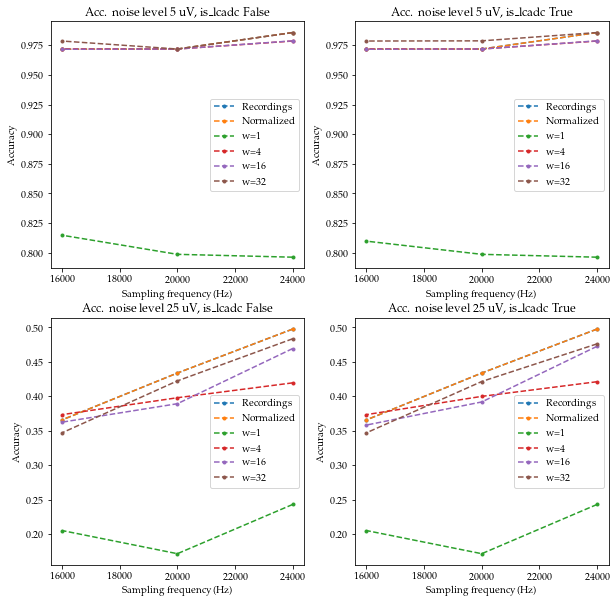

In [130]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(ncols=2,nrows=2)
spiketrain= 8

for head, ax in zip(head_values.values.tolist(), ax.ravel()):
    sel = grouped.loc[(spiketrain,*head,)]
    for srow in sel.itertuples(index=False):
        ax.plot(srow.fs, srow.max_accuracy, '.--',label=srow.label)
    ax.legend()
    ax.set_xlabel("Sampling frequency (Hz)")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Acc. noise level {head[0]} uV, is_lcadc {head[1]}")

In [131]:
evaluations = df[((df["fs"]==20000) & 
                  (df["noise_level"].isin([5])))].copy()
evaluations.loc[evaluations["type"]=="recordings", ("w")] = -1
evaluations

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
80,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 33, 'falsepositive': 3965, '...",0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 0.9989911727616646, 0.88322824...","[0.008254127063531767, 0.008254127063531767, 0...",Recordings,0.078571
81,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 49, 'falsepositive': 3951, '...",1,"[1.0, 1.0, 1.0, 1.0, 0.9183673469387755, 0.612...","[1.0, 1.0, 1.0, 0.9982282966337636, 0.88509238...","[0.01225, 0.01225, 0.01225, 0.0122714750813924...",Recordings,0.020408
82,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 57, 'falsepositive': 3943, '...",2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7894736842105...","[1.0, 1.0, 1.0, 0.9989855440020289, 0.88536647...","[0.01425, 0.01425, 0.01425, 0.0142642642642642...",Recordings,0.037159
83,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 44, 'falsepositive': 3957, '...",3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9772727272727...","[1.0, 1.0, 1.0, 0.9989891331817033, 0.88273944...","[0.010997250687328168, 0.010997250687328168, 0...",Recordings,0.043373
84,4,6000,False,12,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,recordings,/mnt/Data/data/output/evaluator/threshold_reco...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-1,27,"[{'truepositive': 67, 'falsepositive': 3930, '...",4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98507462...","[0.9997456118036123, 0.9997456118036123, 0.999...","[0.01676257192894671, 0.01676257192894671, 0.0...",Recordings,0.082603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47235,784,1000,True,1,20000,5,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00025393600812595224, 0.0002539360081259522...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
47236,784,1000,True,1,20000,5,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002538071065989848, 0.0002538071065989848,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
47237,784,1000,True,1,20000,5,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002570694087403599, 0.0002570694087403599,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",w=32,0.000000
47238,784,1000,True,1,20000,5,/mnt/Data/data/output-bw-300-1000/preprocessor...,neo,/mnt/Data/data/output-bw-300-1000/evaluator_lc...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32,27,"[{'truepositive': 0, 'falsepositive': 1, 'fals...",8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0002591344908007256, 0.0002591344908007256,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [132]:
grouped = evaluations.groupby(["spiketrain","noise_level", "bw_ul", "lcadc", "w"]).agg({'label':'first', 
                              'max_accuracy': lambda x: x.tolist(),
                              'resolution': lambda x: x.tolist()})
grouped

label  \
spiketrain noise_level bw_ul lcadc w                 
0          5           1000  False -1   Recordings   
                                    0   Normalized   
                                    1          w=1   
                                    4          w=4   
                                    16        w=16   
...                                            ...   
9          5           6000  True   0   Normalized   
                                    1          w=1   
                                    4          w=4   
                                    16        w=16   
                                    32        w=32   

                                                                             max_accuracy  \
spiketrain noise_level bw_ul lcadc w                                                        
0          5           1000  False -1   [0.0746606334841629, 0.0746606334841629, 0.074...   
                                    0   [0.0746606334841629, 0.0764525993883792, 0.075...   
                                    1   [0.0681265206812652, 0.07021791767554479, 0.06...   
                                    4   [0.0774818401937046, 0.07729468599033816, 0.07...   
                                    16  [0.075, 0.07520891364902507, 0.074698795180722...   
...                                                                                   ...   
9          5           6000  True   0   [0.1054783319705642, 0.10668924640135478, 0.10...   
                                    1   [0.08662900188323917, 0.0872865275142315, 0.08...   
                                    4   [0.10033444816053512, 0.10596026490066225, 0.1...   
                                    16  [0.09243697478991597, 0.08958333333333333, 0.0...   
                                    32  [0.08236434108527131, 0.08072174738841406, 0.0...   

                                                                 resolution  
spiketrain noise_level bw_ul lcadc w                                         
0          5           1000  False -1   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    0   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    1   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    4   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    16  [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
...                                                                     ...  
9          5           6000  True   0   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    1   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    4   [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    16  [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  
                                    32  [12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]  

[360 rows x 3 columns]

In [133]:
head_values = grouped.loc[(8,)].reset_index()[["bw_ul","lcadc"]].drop_duplicates().sort_values(by=["bw_ul"], ascending=False)
head_values

,bw_ul,lcadc
24,6000,False
30,6000,True
12,3000,False
18,3000,True
0,1000,False
6,1000,True


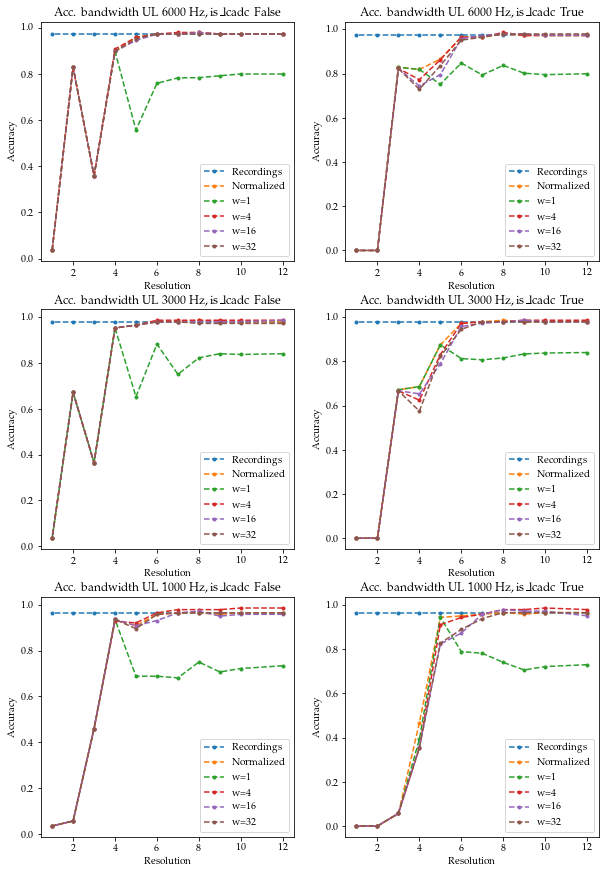

In [134]:
fig = plt.figure(figsize=(10,15))
ax = fig.subplots(ncols=2,nrows=3)
spiketrain= 8
noise_level= 5

for head, ax in zip(head_values.values.tolist(), ax.ravel()):
    sel = grouped.loc[(spiketrain,noise_level, *head,)]
    for srow in sel.itertuples(index=False):
        ax.plot(srow.resolution, srow.max_accuracy, '.--',label=srow.label)
    ax.legend()
    ax.set_xlabel("Resolution")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Acc. bandwidth UL {head[0]} Hz, is_lcadc {head[1]}")

In [208]:
res_test = evaluations.loc[(evaluations["noise_level"]==5) & 
                (evaluations["fs"]==20000)&
                (evaluations["resolution"]==4) &
                (evaluations["bw_ul"]==6000) &
                (evaluations["type"]=="normalized") &
                (evaluations["spiketrain"]==8)
               ]
res_test

,index,bw_ul,lcadc,resolution,fs,noise_level,neo_file,type,evaluator_file,indexes_list,w,channel_index,results,spiketrain,tpr,fpr,accuracy,label,max_accuracy
1778,88,6000,False,4,20000,5,/mnt/Data/data/output/preprocessor/preprocesse...,normalized,/mnt/Data/data/output/evaluator/threshold_norm...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 3858, ...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9997408655091993, 0.15366675304483027, 0.15...","[0.03501750875437719, 0.19099590723055934, 0.1...",Normalized,0.896774
4418,220,6000,True,4,20000,5,/mnt/Data/data/output/preprocessor_lcadc/prepr...,normalized,/mnt/Data/data/output/evaluator_lcadc/threshol...,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,27,"[{'truepositive': 140, 'falsepositive': 354, '...",8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.09173360974345686, 0.062192277792174136, 0....","[0.2834008097165992, 0.3684210526315789, 0.368...",Normalized,0.818182


In [209]:
from eapprocessor.tools.load import load_neo

In [210]:
neo_files_test = res_test["neo_file"]
lcadc= res_test["lcadc"]

In [211]:
results_neo = [load_neo(filename=neo_file, is_lcadc=is_lcadc) for neo_file, is_lcadc in zip(neo_files_test, lcadc)]
neo_dicts, _ = list(zip(*results_neo))

In [212]:
neo_dicts

({'adcinfo': {'resolution': 4, 'voltage_ref': 500},
  'adc': <HDF5 dataset "adc": shape (32, 200000), type "<i8">,
  'normalized': <HDF5 dataset "normalized": shape (32, 200000), type "<f8">,
  'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator at 0x7f83a11fab90>,
  'w': <HDF5 dataset "w": shape (4,), type "<i8">,
  'neo': <HDF5 dataset "neo": shape (4, 32, 200000), type "<f8">},
 {'adcinfo': {'resolution': 4, 'voltage_ref': 500},
  'channels': <HDF5 dataset "channels": shape (32,), type "<i8">,
  'lcadc': [<HDF5 dataset "0": shape (783,), type "<i8">,
   <HDF5 dataset "1": shape (516,), type "<i8">,
   <HDF5 dataset "2": shape (533,), type "<i8">,
   <HDF5 dataset "3": shape (454,), type "<i8">,
   <HDF5 dataset "4": shape (367,), type "<i8">,
   <HDF5 dataset "5": shape (1324,), type "<i8">,
   <HDF5 dataset "6": shape (716,), type "<i8">,
   <HDF5 dataset "7": shape (793,), type "<i8">,
   <HDF5 dataset "8": shape (806,), type "<i8">,
   <HDF5 dataset "9": shape 

In [213]:
from eapprocessor.hwsimulator.adc import dac

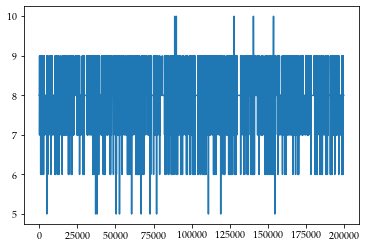

In [214]:
plt.plot(np.array(neo_dicts[0]["adc"])[27])

In [221]:
normalized_no_lcdac = dac(np.array(neo_dicts[0]["adc"])[27],500,4,True)

In [222]:
normalized_lcdac = dac(np.array(neo_dicts[1]["lcadc"][27]),500,4,True)
normalized_lcdac_index = np.array(neo_dicts[1]["indexes"][27])

In [223]:
timestamps = np.array(neo_dicts[0]["recordings"].timestamps)

In [224]:
recordings = np.array(neo_dicts[0]["recordings"].recordings).T

In [225]:
recordings_selected = recordings[27]

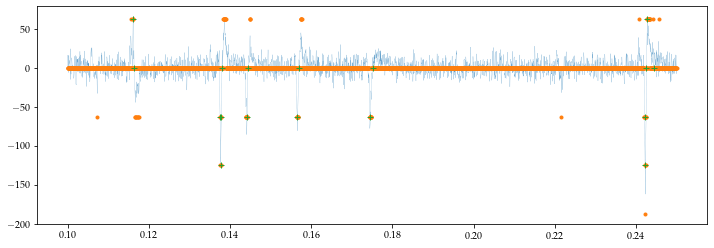

In [226]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)

t_start=0.1
t_stop=0.25

condition_normal = (timestamps>=t_start) & (timestamps<=t_stop)
condition_lcadc = (timestamps[normalized_lcdac_index]>=t_start) & (timestamps[normalized_lcdac_index]<=t_stop)

ax.plot(timestamps[condition_normal], recordings_selected[condition_normal],"--",linewidth=0.2)
ax.plot(timestamps[condition_normal], normalized_no_lcdac[condition_normal],".")
ax.plot(timestamps[normalized_lcdac_index][condition_lcadc], normalized_lcdac[condition_lcadc],"+")

**The difference is due to LCADC implementation converts if the difference exceds the step, while the normal converter rounds the quantization value.**

In [144]:
len(condition_normal)

200000

In [151]:
res_test = df.loc[(df["noise_level"]==5) & 
                (df["fs"]==20000)&
                (df["resolution"]==3) &
                (df["bw_ul"]==6000) &
                (df["type"]=="normalized") &
                (df["spiketrain"]==8)
               ]
neo_files_test = res_test["neo_file"]
lcadc= res_test["lcadc"]
results_neo = [load_neo(filename=neo_file, is_lcadc=is_lcadc) for neo_file, is_lcadc in zip(neo_files_test, lcadc)]
neo_dicts, _ = list(zip(*results_neo))

In [152]:
normalized_no_lcdac = np.array(neo_dicts[0]["normalized"])[27]
normalized_lcdac = np.array(neo_dicts[1]["normalized"][27])
normalized_lcdac_index = np.array(neo_dicts[1]["indexes"][27])
timestamps = np.array(neo_dicts[0]["recordings"].timestamps)

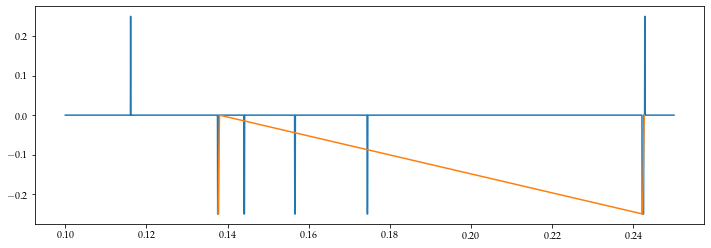

In [155]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)

t_start=0.1
t_stop=0.25

condition_normal = (timestamps>=t_start) & (timestamps<=t_stop)
condition_lcadc = (timestamps[normalized_lcdac_index]>=t_start) & (timestamps[normalized_lcdac_index]<=t_stop)

ax.plot(timestamps[condition_normal], normalized_no_lcdac[condition_normal])
ax.plot(timestamps[normalized_lcdac_index][condition_lcadc], normalized_lcdac[condition_lcadc])